# Data Science Capstone Project
#### Noelle Reid

## Data Cleaning & Preprocessing

In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import time

In [2]:
# import dataset
df = pd.read_csv('/Users/noellereid/Desktop/SPRING 2025/DS 480/SleepStudy.csv', header=0, sep = ",")

In [3]:
# preview first five observations
df.head()

,Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,...,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,0,4,Neither,0,0,3.60,0,-0.26,4,4,...,Moderate,10,25.75,8.70,7.70,25.75,9.50,5.88,7.18,0
1,0,4,Neither,2,1,3.24,0,1.39,6,1,...,Moderate,6,25.70,8.20,6.80,26.00,10.00,7.25,6.93,0
2,0,4,Owl,0,0,2.97,12,0.38,18,18,...,Light,3,27.44,6.55,3.00,28.00,12.59,10.09,5.02,0
3,0,1,Lark,5,1,3.76,0,1.39,9,1,...,Light,2,23.50,7.17,6.77,27.00,8.00,7.25,6.90,0
4,0,4,Owl,0,0,3.20,4,1.22,9,7,...,Moderate,4,25.90,8.67,6.09,23.75,9.50,7.00,6.35,0


#### Data Types / Null Values

In [4]:
# no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            253 non-null    int64  
 1   ClassYear         253 non-null    int64  
 2   LarkOwl           253 non-null    object 
 3   NumEarlyClass     253 non-null    int64  
 4   EarlyClass        253 non-null    int64  
 5   GPA               253 non-null    float64
 6   ClassesMissed     253 non-null    int64  
 7   CognitionZscore   253 non-null    float64
 8   PoorSleepQuality  253 non-null    int64  
 9   DepressionScore   253 non-null    int64  
 10  AnxietyScore      253 non-null    int64  
 11  StressScore       253 non-null    int64  
 12  DepressionStatus  253 non-null    object 
 13  AnxietyStatus     253 non-null    object 
 14  Stress            253 non-null    object 
 15  DASScore          253 non-null    int64  
 16  Happiness         253 non-null    int64  
 1

#### Create Dummy Variables

In [5]:
df = pd.get_dummies(df, columns=['LarkOwl','DepressionStatus','AnxietyStatus','Stress','AlcoholUse'], drop_first = True)
df.head()

,Gender,ClassYear,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,...,LarkOwl_Neither,LarkOwl_Owl,DepressionStatus_normal,DepressionStatus_severe,AnxietyStatus_normal,AnxietyStatus_severe,Stress_normal,AlcoholUse_Heavy,AlcoholUse_Light,AlcoholUse_Moderate
0,0,4,0,0,3.60,0,-0.26,4,4,3,...,True,False,True,False,True,False,True,False,False,True
1,0,4,2,1,3.24,0,1.39,6,1,0,...,True,False,True,False,True,False,True,False,False,True
2,0,4,0,0,2.97,12,0.38,18,18,18,...,False,True,False,False,False,True,True,False,True,False
3,0,1,5,1,3.76,0,1.39,9,1,4,...,False,False,True,False,True,False,True,False,True,False
4,0,4,0,0,3.20,4,1.22,9,7,25,...,False,True,True,False,False,True,True,False,False,True


#### Check for Duplicate Observations

In [6]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Gender, ClassYear, NumEarlyClass, EarlyClass, GPA, ClassesMissed, CognitionZscore, PoorSleepQuality, DepressionScore, AnxietyScore, StressScore, DASScore, Happiness, Drinks, WeekdayBed, WeekdayRise, WeekdaySleep, WeekendBed, WeekendRise, WeekendSleep, AverageSleep, AllNighter, LarkOwl_Neither, LarkOwl_Owl, DepressionStatus_normal, DepressionStatus_severe, AnxietyStatus_normal, AnxietyStatus_severe, Stress_normal, AlcoholUse_Heavy, AlcoholUse_Light, AlcoholUse_Moderate]
Index: []

[0 rows x 32 columns]


## Exploratory Data Analysis

### PCA : Identifying Outliers

In [7]:
# load necessary libararies
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
X = pd.read_csv('/Users/noellereid/Desktop/SPRING 2025/DS 480/SleepStudy.csv', header=0, sep = ",")
# select numerical features
features = df.select_dtypes(include=[np.number])
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [9]:
# initialize PCA
pca = PCA()
pca.fit(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [1.83267786e-01 1.54261453e-01 1.28824105e-01 8.68203354e-02
 6.58412418e-02 5.67678556e-02 4.20418675e-02 4.00746830e-02
 3.88344777e-02 3.52621806e-02 3.16094980e-02 2.91859023e-02
 2.37722345e-02 2.12319135e-02 1.88141572e-02 1.67653380e-02
 9.52559813e-03 8.91755409e-03 6.92303708e-03 1.25854004e-03
 2.40836246e-07 3.44443463e-33]


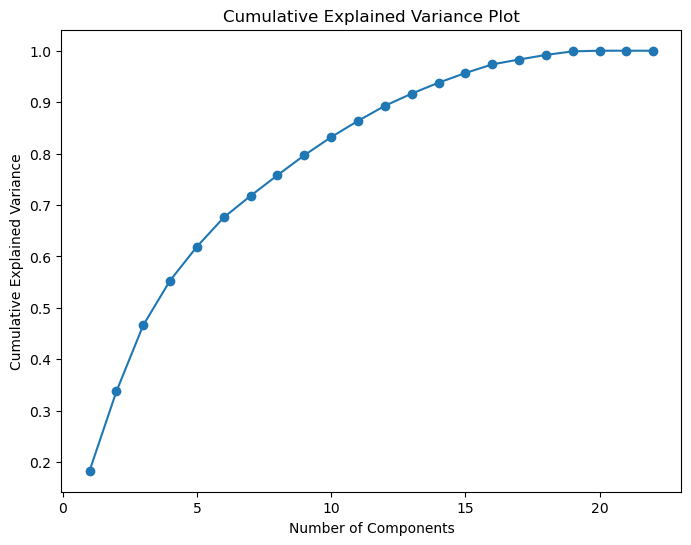

In [10]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
        np.cumsum(pca.explained_variance_ratio_),
        marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


PCA exp: to retain approximately 90% of the variance in the data we would have to to keep 12 principal components which is excessive. After about 3 PCs, the increase in variance kept is minimal, so we should be fine only looking at 3. overall, the data doesnt cluster well which is kind of expected to see in a real-world data set. im saying there are no outliers. 

In [11]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

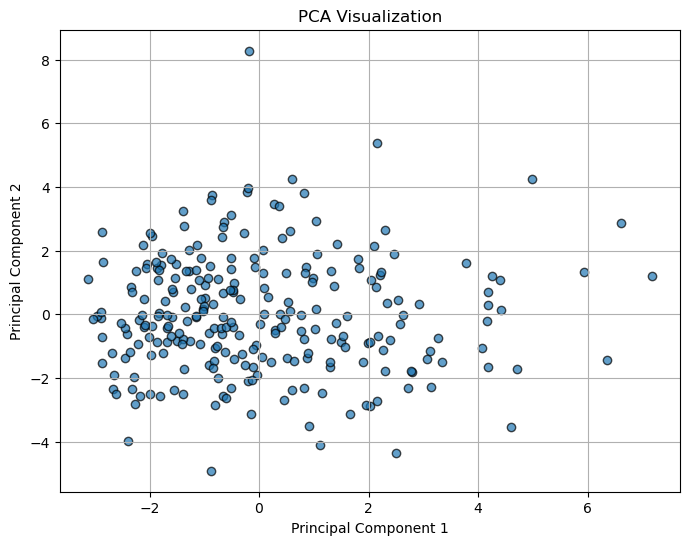

In [12]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], edgecolor='k', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.title('PCA Visualization')
plt.show()

In [13]:
pca = PCA(n_components=5)  # Use more components
pca.fit(X_scaled)
print(pca.explained_variance_ratio_) 

[0.18326779 0.15426145 0.12882411 0.08682034 0.06584124]


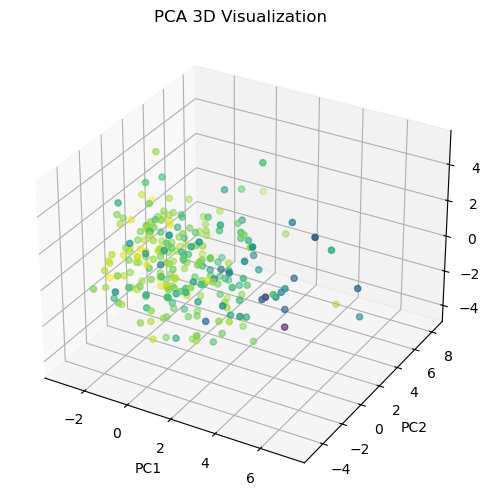

In [14]:
# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
y = df["Happiness"]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Visualization')
plt.show()

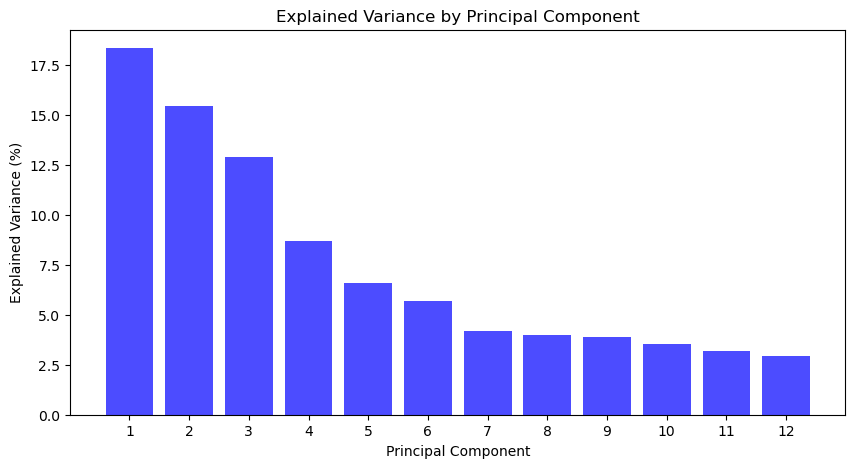

In [15]:
# Apply PCA
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

# Bar plot for explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, 13), explained_variance * 100, alpha=0.7, color="blue")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Explained Variance by Principal Component")
plt.xticks(range(1, 13))
plt.show()


In [16]:
df.describe()

,Gender,ClassYear,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,...,Happiness,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.403162,2.478261,1.735178,0.664032,3.243794,2.209486,-0.000040,6.256917,5.201581,5.371542,...,26.110672,5.569170,24.847708,8.585652,7.866008,25.584585,10.204111,8.217233,7.965929,0.134387
std,0.491505,1.037263,1.536922,0.473264,0.404284,3.240307,0.706828,2.919761,6.000899,5.197327,...,5.488408,4.095119,1.033697,0.943339,1.167788,1.273104,1.401356,1.366785,0.964840,0.341744
min,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,-1.620000,1.000000,0.000000,0.000000,...,0.000000,0.000000,21.800000,5.500000,3.000000,21.500000,5.250000,4.000000,4.950000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,-0.480000,4.000000,1.000000,1.000000,...,24.000000,3.000000,24.200000,8.000000,7.200000,24.880000,9.250000,7.250000,7.430000,0.000000
50%,0.000000,2.000000,2.000000,1.000000,3.300000,1.000000,-0.010000,6.000000,3.000000,4.000000,...,28.000000,5.000000,24.800000,8.500000,7.950000,25.500000,10.250000,8.250000,8.000000,0.000000
75%,1.000000,3.000000,3.000000,1.000000,3.500000,3.000000,0.440000,8.000000,7.000000,8.000000,...,30.000000,8.000000,25.500000,9.150000,8.600000,26.250000,11.000000,9.250000,8.590000,0.000000
max,1.000000,4.000000,5.000000,1.000000,4.000000,20.000000,1.960000,18.000000,35.000000,26.000000,...,35.000000,24.000000,29.100000,12.020000,10.970000,30.250000,15.000000,12.750000,10.620000,1.000000


### Distribution of Happiness Score

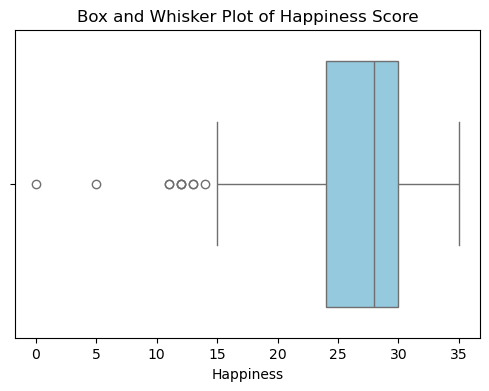

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Happiness', color='skyblue')
plt.title('Box and Whisker Plot of Happiness Score')
plt.xlabel('Happiness')
plt.show()
# check if 0 was an entry error

### Correlation Matrix


In [18]:
# what kind of visualizations should i make? 
# identifying outliers : use PCA, look at PC 1-3, pay attention to the number of variance explained by PC
# visually identify outliers, see if there is a reason it is far off, eliminate if there is an error
# residuals, normally distributed, checking all assumptions of linear regression 
# box plot of happiness score


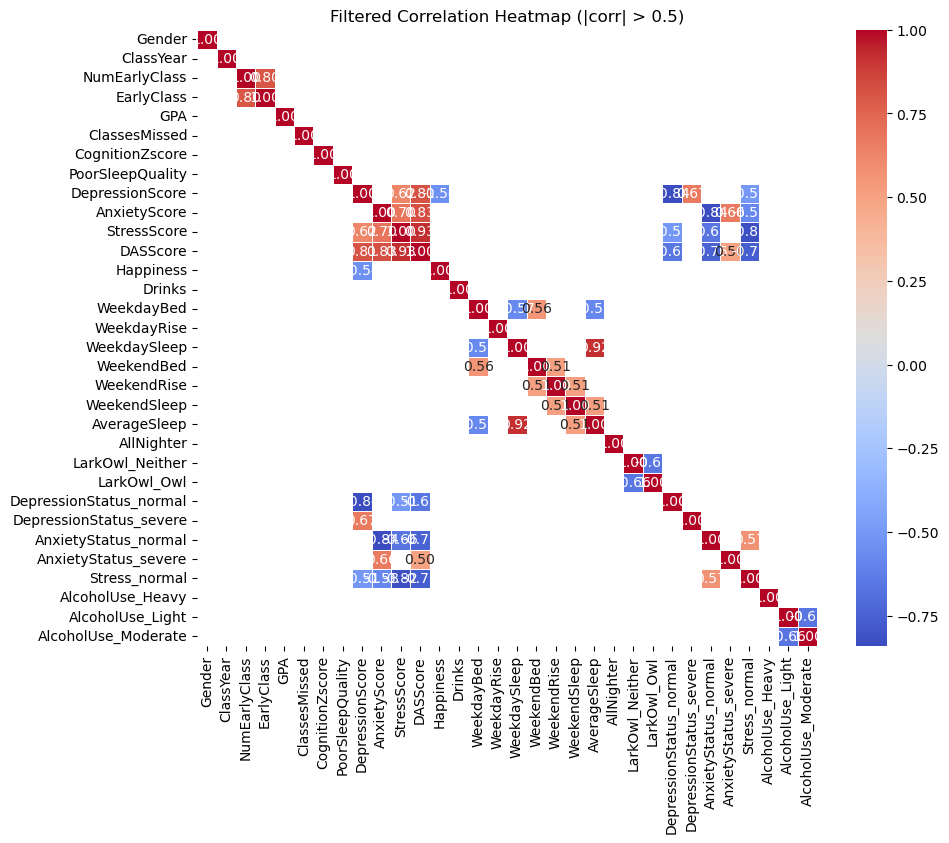

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df.corr()

# Mask values where correlation is below a threshold
threshold = 0.5  # Adjust as needed
mask = np.abs(corr_matrix) < threshold
filtered_corr = corr_matrix.where(~mask, np.nan)

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Filtered Correlation Heatmap (|corr| > 0.5)")
plt.show()



In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Ensure X is a DataFrame to keep column names
# Select only numeric columns
X = df.select_dtypes(include=[float, int])

#X = df.drop(columns=['Happiness'])  # Replace 'y' with the target variable

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  # Keep column names
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


            Variable           VIF
0             Gender  2.396265e+00
1          ClassYear  8.445269e+00
2      NumEarlyClass  8.055621e+00
3         EarlyClass  9.092693e+00
4                GPA  8.888683e+01
5      ClassesMissed  1.872420e+00
6    CognitionZscore  1.191436e+00
7   PoorSleepQuality  8.944596e+00
8    DepressionScore           inf
9       AnxietyScore           inf
10       StressScore           inf
11          DASScore           inf
12         Happiness  3.701832e+01
13            Drinks  3.952798e+00
14        WeekdayBed  7.511993e+02
15       WeekdayRise  2.748974e+02
16      WeekdaySleep  3.433898e+06
17        WeekendBed  7.663240e+02
18       WeekendRise  1.463753e+02
19      WeekendSleep  6.031969e+05
20      AverageSleep  6.854890e+06
21        AllNighter  1.466054e+00


/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


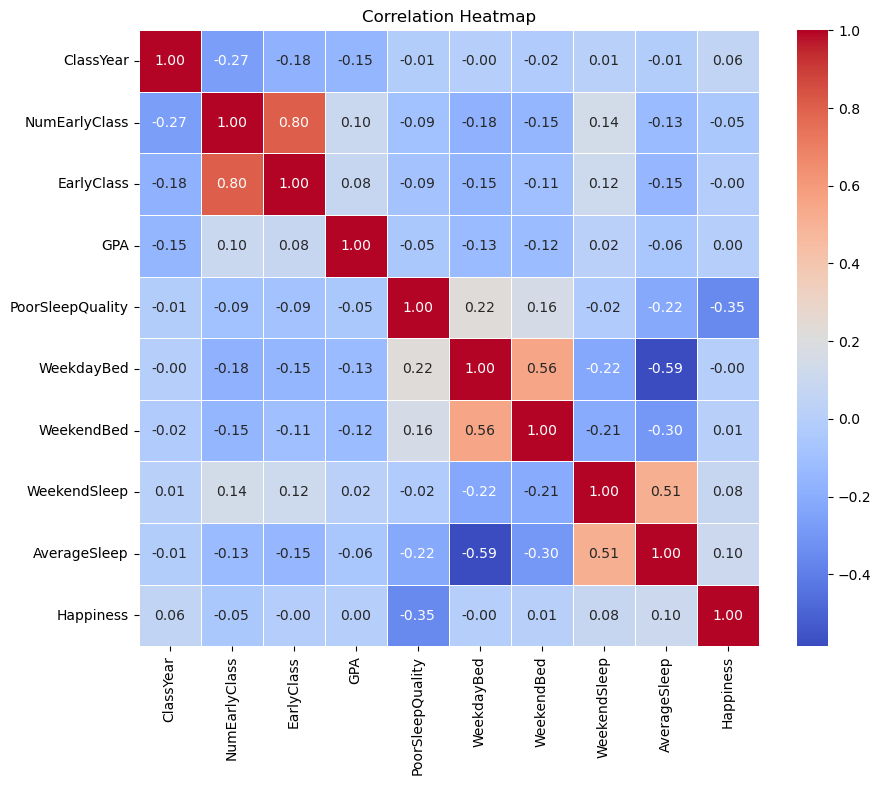

In [21]:
# correlation matrix with high vif vars
# pull necessary cols from dataframe
cols = ['ClassYear','NumEarlyClass','EarlyClass','GPA','PoorSleepQuality','WeekdayBed','WeekendBed','WeekendSleep','AverageSleep','Happiness']
sub_df = df[cols].copy()

# create correlation matrix
corr_mat = sub_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
# drop early class, weekday bed, weekend sleep

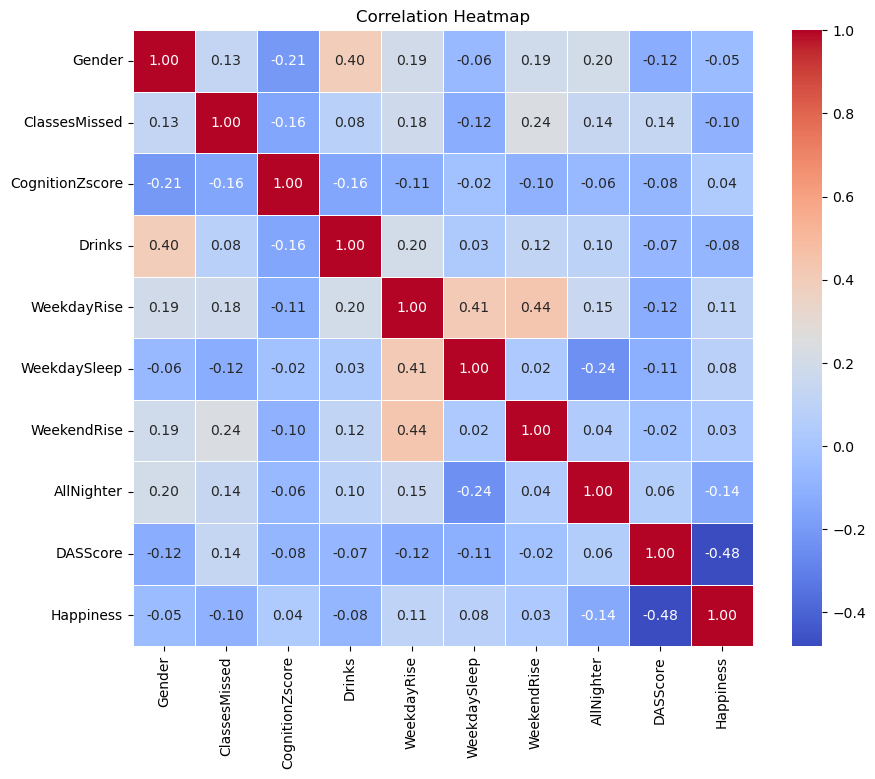

In [22]:
# correlation matrix
# pull necessary cols from dataframe
cols = ['Gender','ClassesMissed','CognitionZscore','Drinks','WeekdayRise','WeekdaySleep','WeekendRise','AllNighter','DASScore','Happiness']
sub_df = df[cols].copy()

# create correlation matrix
corr_mat = sub_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Linear Regression
Assumptions are checked below. We are assuming that each observation is independent of each other because responses are unique to each individual.

In [194]:
# load necessary libraries
from sklearn.metrics import mean_squared_error

In [195]:
# forward stepwise selection algorithm
def forward_stepwise_selection(X, y, aic_threshold=2):
    selected_features = [] # stores chosen features
    remaining_features = list(X.columns) # stores features not yet chosen
    best_aic = float('inf') # initialize best mse to a high value

    while remaining_features:
        scores = []
        for feature in remaining_features:
            candidate_features = selected_features + [feature]

            X_subset = sm.add_constant(X[candidate_features])
            model = sm.OLS(y, X_subset).fit() # fit ols model
            y_pred = model.predict(X_subset) # make predictions
            aic = model.aic # calc aic
            scores.append((aic, feature))

        scores.sort() # sort by lowest aic
        best_new_aic, best_new_feature = scores[0] #feature with lowest aic

        if best_aic - best_new_aic >= aic_threshold: 
            best_aic = best_new_aic
            selected_features.append(best_new_feature)
            remaining_features.remove(best_new_feature)
        else:
            break

    return selected_features

In [196]:
# feature selection -- BASELINE LR
y = df['Happiness']
# drop highly correlated vars
X = df.drop(columns=['Happiness','DepressionScore','AnxietyScore','StressScore','EarlyClass','WeekendSleep','WeekdayBed'])
X = X.astype(int)
selected_features = forward_stepwise_selection(X, y)
print("Selected Features: ", selected_features)

Selected Features:  ['DASScore', 'PoorSleepQuality', 'DepressionStatus_severe']


In [197]:
# new df with just selected features
X_selected = df[selected_features].copy()
# convert boolean columns to numeric
boolean_cols = X_selected.select_dtypes(include=['bool']).columns
X_selected[boolean_cols] = X_selected[boolean_cols].astype(int)

In [198]:
# create model using these features
y = df['Happiness']
X_selected = sm.add_constant(X_selected)
start_time = time.time() # start timer
baseline_model = sm.OLS(y.loc[X_selected.index], X_selected).fit() # fit model 
end_time = time.time() # end timer
total_time = end_time - start_time
print(f"Wall time for fitting the model: {total_time:.4f} seconds")
y_pred = baseline_model.predict(X_selected)
# Calculate MSE
mse = mean_squared_error(y[X_selected.index], y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(baseline_model.summary())

Wall time for fitting the model: 0.0022 seconds
Mean Squared Error (MSE): 21.9755
                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     30.32
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           9.62e-17
Time:                        20:38:28   Log-Likelihood:                -749.87
No. Observations:                 253   AIC:                             1508.
Df Residuals:                     249   BIC:                             1522.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

### Linearity & Homoscedasticity (residual plot)

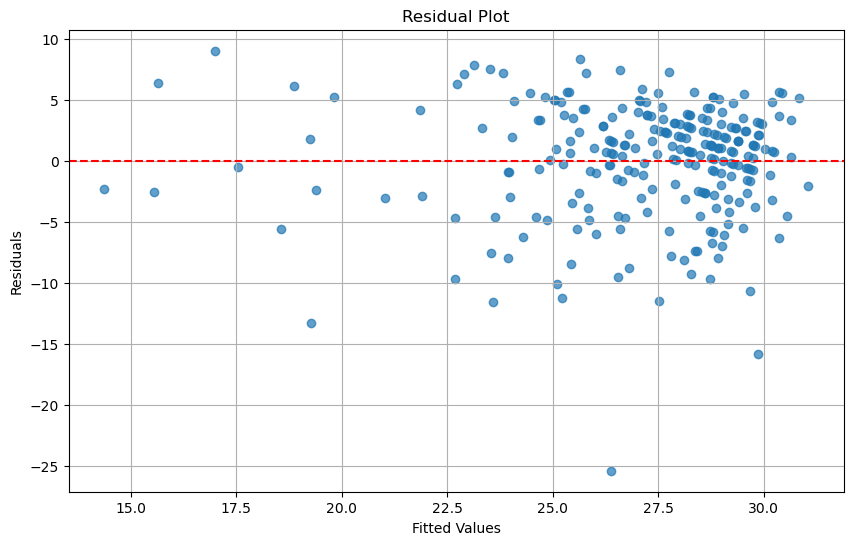

In [199]:
# calc residuals
residuals = baseline_model.resid
fitted_vals = baseline_model.fittedvalues

# create plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Line at zero for reference
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

### No Multicolinearity (check VIF)

In [200]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
print(vif_data)

                   Feature       VIF
0                    const  6.024798
1                 DASScore  1.548284
2         PoorSleepQuality  1.269968
3  DepressionStatus_severe  1.330921


### Normality (qq plot)

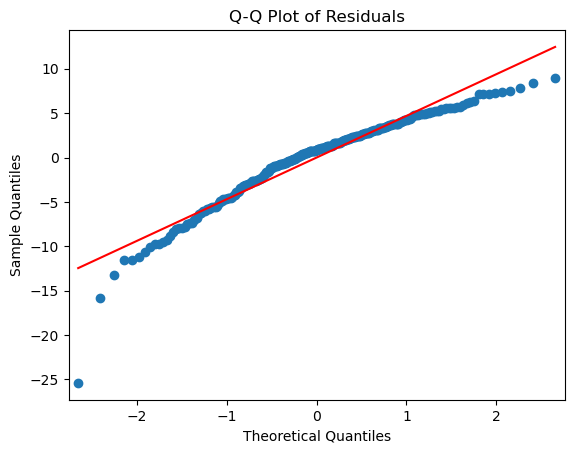

In [201]:
sm.qqplot(baseline_model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [202]:
# BOXCOX TRANSFORMATION 
import scipy.stats as stats
# Ensure y is strictly positive
y = df['Happiness']
if (y <= 0).any():
    y += np.abs(y.min()) + 1  # Shift to make all values positive
y_transformed, lambda_ = stats.boxcox(y) # apply tranformation 

In [203]:
# BOXCOX FEATURE SELECTION 
# drop highly correlated vars
X = df.drop(columns=['Happiness','DepressionScore','AnxietyScore','StressScore','EarlyClass','WeekendSleep','WeekdayBed'])
X = X.astype(int)
selected_features = forward_stepwise_selection(X, y_transformed)
print("Selected Features: ", selected_features)

Selected Features:  ['DASScore', 'PoorSleepQuality']


In [204]:
# BOXCOX MODEL 
from scipy.special import inv_boxcox

# Create new DataFrame with only the selected features
X_selected = df[selected_features].copy()
X_selected = sm.add_constant(X_selected)  # Add constant for intercept

start_time = time.time() # start timer

# Fit the model with the clean dataset
bc_model = sm.OLS(y_transformed[X_selected.index], X_selected).fit()

end_time = time.time() # end timer
total_time = end_time - start_time

# predict in bc scale
y_pred_bc = bc_model.predict(X_selected)
# convert back to original scale
y_pred_original = inv_boxcox(y_pred_transformed, lambda_)
mse_original = mean_squared_error(y[X_selected.index], y_pred_original)
print(f"Mean Squared Error (Original Scale): {mse_original:.4f}")

print(f"Wall time for fitting the model: {total_time:.4f} seconds")
print(bc_model.summary())


Mean Squared Error (Original Scale): 22.9653
Wall time for fitting the model: 0.0013 seconds
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     41.23
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           3.36e-16
Time:                        20:38:54   Log-Likelihood:                -2095.3
No. Observations:                 253   AIC:                             4197.
Df Residuals:                     250   BIC:                             4207.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

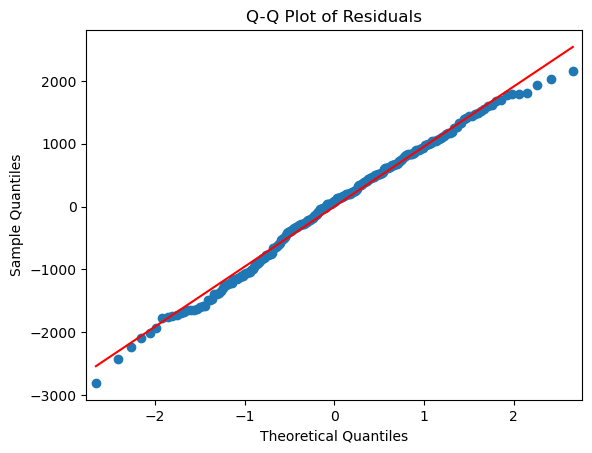

In [207]:
# RECHECK ASSUMPTIONS
sm.qqplot(bc_model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

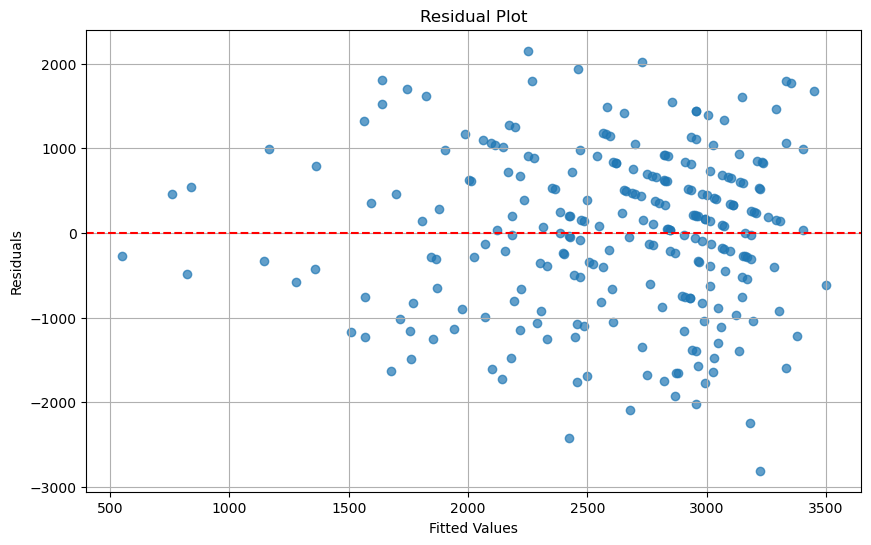

In [208]:
# calc residuals
residuals = bc_model.resid
fitted_vals = bc_model.fittedvalues

# create plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Line at zero for reference
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

In [209]:
# LASSO -- worse, dont use 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(columns=['Happiness','DepressionScore','AnxietyScore','StressScore','EarlyClass','WeekendSleep','WeekdayBed'])  # Features
X = X.astype(int)
y = df['Happiness']  # Target variable

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit the Lasso model
lasso = Lasso(alpha=0.1)  # You can tune alpha for regularization strength
lasso.fit(X_train_scaled, y_train)

# predict on and evaluate the model
y_pred = lasso.predict(X_test_scaled)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Check the coefficients
print("Lasso Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f'{feature}: {coef:.4f}')


Mean Squared Error: 32.0516
R-squared: 0.0957
Lasso Coefficients:
Gender: 0.1138
ClassYear: 0.0000
NumEarlyClass: -0.3936
GPA: 0.0000
ClassesMissed: 0.0000
CognitionZscore: -0.2395
PoorSleepQuality: -0.7523
DASScore: -1.6755
Drinks: -0.9740
WeekdayRise: 0.2027
WeekdaySleep: -0.1916
WeekendBed: 0.3263
WeekendRise: -0.0000
AverageSleep: 0.0000
AllNighter: -1.0533
LarkOwl_Neither: -0.0108
LarkOwl_Owl: 0.2049
DepressionStatus_normal: 0.7233
DepressionStatus_severe: -0.0497
AnxietyStatus_normal: -0.0432
AnxietyStatus_severe: 0.0685
Stress_normal: 0.0000
AlcoholUse_Heavy: 0.7067
AlcoholUse_Light: -0.0000
AlcoholUse_Moderate: 0.1035


## Cross-Validated Linear Regression using BoxCox

In [210]:
# necessary libraries
from sklearn.model_selection import KFold
from scipy.special import inv_boxcox

In [257]:
# CV BC MODEL 
kf = KFold(n_splits=5, shuffle=True, random_state=42) # define number of folds
mse_scores = [] # store mse for each fold
start = time.time() 

y_transformed, lambda_ = stats.boxcox(y)
X = df[['DASScore','PoorSleepQuality']]
X = sm.add_constant(X)

all_preds = []
all_actuals = []

# cross validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_transformed[train_index], y_transformed[test_index]

    # fit model
    cv_model = sm.OLS(y_train, X_train).fit()

    # predict on test set
    y_pred_cv = cv_model.predict(X_test)

    # Convert predictions & y_test back to original scale
    if lambda_ == 0:
        y_pred_cv_original = np.exp(y_pred_cv)  # Inverse for lambda = 0
        y_test_original = np.exp(y_test)
    else:
        y_pred_cv_original = (lambda_ * y_pred_cv + 1) ** (1 / lambda_)  # Inverse for lambda ≠ 0
        y_test_original = (lambda_ * y_test + 1) ** (1 / lambda_)

        # Store for later plotting
    all_preds.extend(y_pred_cv_original)
    all_actuals.extend(y_test_original)

    # Calculate MSE in original scale
    mse = mean_squared_error(y_test_original, y_pred_cv_original)
    mse_scores.append(mse)  # Store MSE for this fold


end = time.time()
total_time_cv = end - start


print(f"Wall time for cross-validation: {total_time_cv:.4f} seconds")
print(f"Mean Squared Error (MSE) for each fold: {mse_scores}")
print(f"Average MSE across all folds: {np.mean(mse_scores):.4f}")
print(cv_model.summary())

Wall time for cross-validation: 0.0365 seconds
Mean Squared Error (MSE) for each fold: [29.179513294406398, 15.463402836032715, 21.045555348528385, 32.14618703549512, 19.419265772732636]
Average MSE across all folds: 23.4508
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     39.59
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           3.27e-15
Time:                        22:30:03   Log-Likelihood:                -1676.5
No. Observations:                 203   AIC:                             3359.
Df Residuals:                     200   BIC:                             3369.
Df Model:                           2                                         
Covariance Type:            nonrobust                           

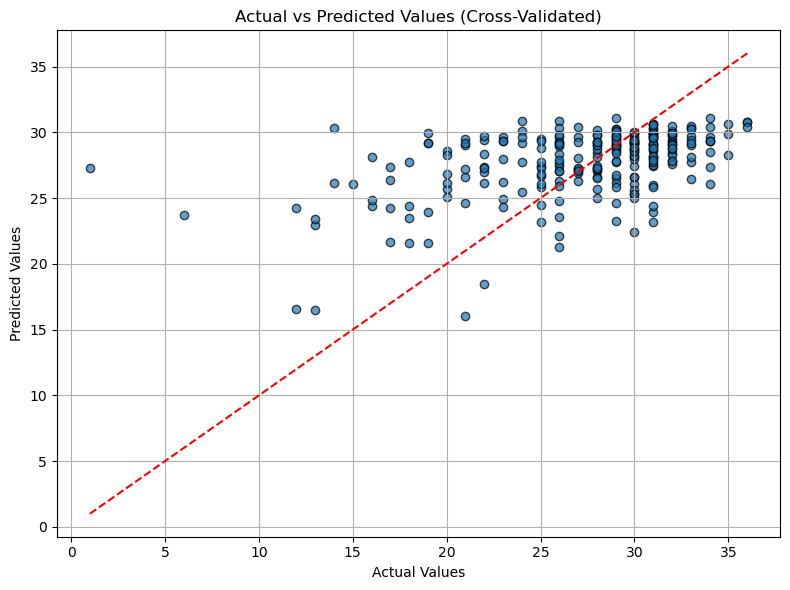

In [258]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(all_actuals, all_preds, alpha=0.7, edgecolor='k')
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Cross-Validated)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Neural Network

In [232]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F

#### Prepare Dataset

In [233]:
# convert np arrays to pytorch sensors
scaler = StandardScaler()
X = df.drop(columns=['Happiness','DepressionScore','AnxietyScore','StressScore','EarlyClass','WeekendSleep','WeekdayBed'])
X = X.astype(int).values
X_scaled = scaler.fit_transform(X)
y = df['Happiness'].values
X_tensor = torch.FloatTensor(X_scaled)
y_tensor = torch.FloatTensor(y)

In [234]:
# create dataset and data loader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True)
# batch size 32 for fast convergence and stable updates. may need tuning to generalize

#### Define Neural Network Model 

In [235]:
# feed forward neural network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__() # call nn.module constructor
        self.fc1 = nn.Linear(25,64) # input to hidden
        self.fc2 = nn.Linear(64, 32) # hidden 1 to hidden 2
        self.fc3 = nn.Linear(32, 1) # hidden 2 to output (chose 2 layers bc prob is relatively simple)
        self.relu = nn.ReLU() # activation function 

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# instantiate the model
nn_model = NeuralNet()  

#### Define Loss Function and Optimizer

In [236]:
criterion = nn.MSELoss()  # mse for regression
optimizer = optim.Adam(nn_model.parameters(), lr=0.0001)  # Adam optimizer

#### Train the model

In [237]:
num_epochs = 200
loss_values = []
ten_epoch_losses = []
mse_values = []
start = time.time()

for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = nn_model(inputs)
        
        # Calculate loss
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
    loss_values.append(loss.item())

    # Calculate MSE on the entire training set
    with torch.no_grad():
        all_inputs, all_targets = next(iter(dataloader))  # Get all data
        predictions = nn_model(all_inputs)
        mse = F.mse_loss(predictions, all_targets).item()
        mse_values.append(mse)
    
    if (epoch + 1) % 10 == 0:  # Print loss every 10 epochs
        ten_epoch_losses.append(loss.item())
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, MSE: {mse:.4f}')

end = time.time()
total_time = end-start
print(f"Total wall time for training: {total_time:.4f} seconds")

/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([29])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/var/folders/3t/mch7dsh50cxbw2mxklw37wsh0000gn/T/ipykernel_34572/748441702.py:30: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcastin

Epoch [10/200], Loss: 791.2655, MSE: 781.9946
Epoch [20/200], Loss: 723.8614, MSE: 735.1086
Epoch [30/200], Loss: 682.0995, MSE: 660.5341
Epoch [40/200], Loss: 694.4158, MSE: 640.3808
Epoch [50/200], Loss: 605.0626, MSE: 609.1280
Epoch [60/200], Loss: 684.5273, MSE: 574.1689
Epoch [70/200], Loss: 501.9266, MSE: 515.5554
Epoch [80/200], Loss: 466.8201, MSE: 417.7698
Epoch [90/200], Loss: 406.7306, MSE: 307.2930
Epoch [100/200], Loss: 283.3903, MSE: 274.3926
Epoch [110/200], Loss: 198.5220, MSE: 223.2140
Epoch [120/200], Loss: 131.2311, MSE: 152.2723
Epoch [130/200], Loss: 125.9633, MSE: 106.0105
Epoch [140/200], Loss: 65.1740, MSE: 88.2012
Epoch [150/200], Loss: 56.7602, MSE: 69.6420
Epoch [160/200], Loss: 53.7806, MSE: 57.4358
Epoch [170/200], Loss: 60.3319, MSE: 38.1182
Epoch [180/200], Loss: 46.7549, MSE: 43.1240
Epoch [190/200], Loss: 58.1750, MSE: 33.4128
Epoch [200/200], Loss: 39.8773, MSE: 44.1512
Total wall time for training: 1.5744 seconds


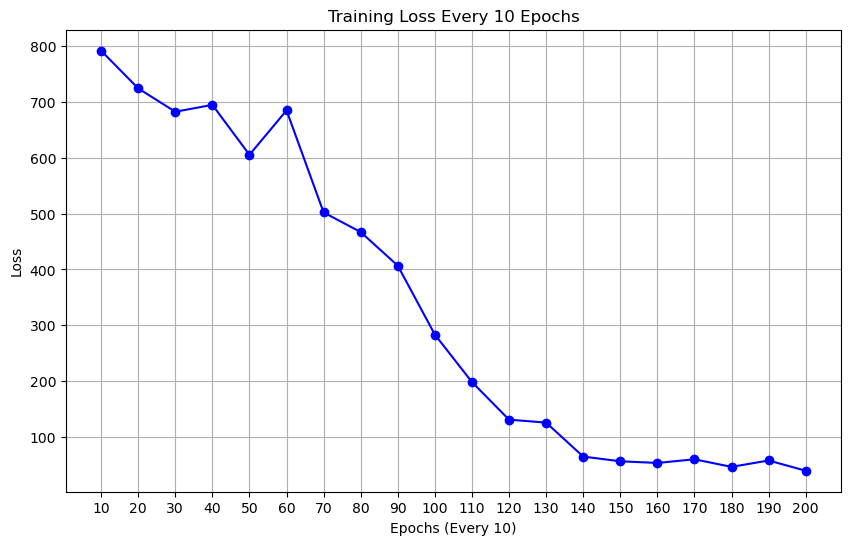

In [238]:
import matplotlib.pyplot as plt

# Assuming ten_epoch_losses contains the loss values and the corresponding epoch numbers are 10, 20, ..., 100
epochs_ten = list(range(10, num_epochs + 1, 10))  # Create a list for the corresponding epochs

# Plotting the losses every 10 epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs_ten, ten_epoch_losses, marker='o', color='b')  # Use blue line with markers
plt.xlabel('Epochs (Every 10)')
plt.ylabel('Loss')
plt.title('Training Loss Every 10 Epochs')
plt.xticks(epochs_ten)  # Set x-ticks to show every 10 epochs
plt.grid()
plt.show()




#### Cross Validate Neural Network 

In [250]:
# define parameters
num_epochs = 150
k_folds = 5
loss_values = []
epoch_losses = []
cv_losses = []  # Loss for each fold

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

start_cv = time.time()  # Start cross-validation timer

# added
all_y_true = []
all_y_pred = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):

    # Split data
    X_train, X_val = torch.FloatTensor(X[train_idx]), torch.FloatTensor(X[val_idx])
    y_train, y_val = torch.FloatTensor(y[train_idx]), torch.FloatTensor(y[val_idx])

    # Create DataLoaders
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    # Reinitialize the model for each fold
    nn_model = NeuralNet()
    optimizer = optim.Adam(nn_model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    start_fold = time.time()  # Start timer for this fold

    for epoch in range(num_epochs):
        nn_model.train()  # Set model to training mode
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = nn_model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        # Evaluate on validation set
        nn_model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        train_mse = 0.0
        val_mse = 0.0
        
        with torch.no_grad():
            # Compute MSE for training set
            all_train_inputs, all_train_targets = next(iter(train_loader))
            train_preds = nn_model(all_train_inputs)
            train_mse = F.mse_loss(train_preds, all_train_targets).item()

            # Compute MSE for validation set
            for inputs, targets in val_loader:
                outputs = nn_model(inputs)
                val_loss += criterion(outputs, targets).item()
                val_mse += F.mse_loss(outputs, targets).item()

                    # added
            for inputs, targets in val_loader:
                preds = nn_model(inputs)
                all_y_true.extend(targets.numpy())
                all_y_pred.extend(preds.numpy().flatten())

        val_loss /= len(val_loader)  # Average validation loss
        loss_values.append(val_loss)

        if (epoch + 1) % 10 == 0:
            epoch_losses.append(val_loss)
            # print(f"Fold {fold+1}, Epoch [{epoch + 1}/{num_epochs}], Val Loss: {val_loss:.4f}, Train MSE: {train_mse:.4f}, Val MSE: {val_mse:.4f}")

    end_fold = time.time()  # End timer for this fold
    fold_time = end_fold - start_fold

    cv_losses.append(val_loss)  # Store final loss for this fold

end_cv = time.time()  # End cross-validation timer
nn_time = end_cv - start_cv

# Print results
print("\nCross-Validation Results:")
for i, loss in enumerate(cv_losses):
    print(f"Fold {i+1}: Avg Validation Loss = {loss:.4f}")

avg_cv_loss = sum(cv_losses) / k_folds
print(f"\nAverage Cross-Validation Loss: {avg_cv_loss:.4f}")
print(f"Total Cross-Validation Time: {nn_time:.4f} seconds")


/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/var/folders/3t/mch7dsh50cxbw2mxklw37wsh0000gn/T/ipykernel_34572/2755825255.py:54: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasti


Cross-Validation Results:
Fold 1: Avg Validation Loss = 37.2186
Fold 2: Avg Validation Loss = 25.9960
Fold 3: Avg Validation Loss = 33.8461
Fold 4: Avg Validation Loss = 28.3615
Fold 5: Avg Validation Loss = 26.8499

Average Cross-Validation Loss: 30.4544
Total Cross-Validation Time: 8.2379 seconds


## Visualizations

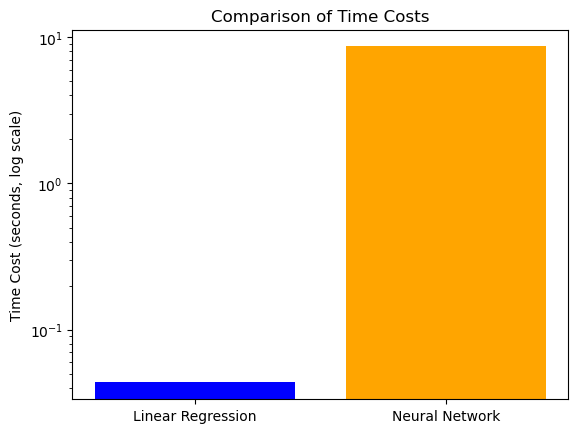

In [256]:
# TIME COST COMPARISON 
models = ['Linear Regression', 'Neural Network']
costs = [total_time_cv, nn_time]

plt.bar(models, costs, color=['blue', 'orange'])
plt.ylabel('Time Cost (seconds, log scale)')
plt.title('Comparison of Time Costs')
plt.yscale('log')  # Use log scale if there's a large difference
plt.show()

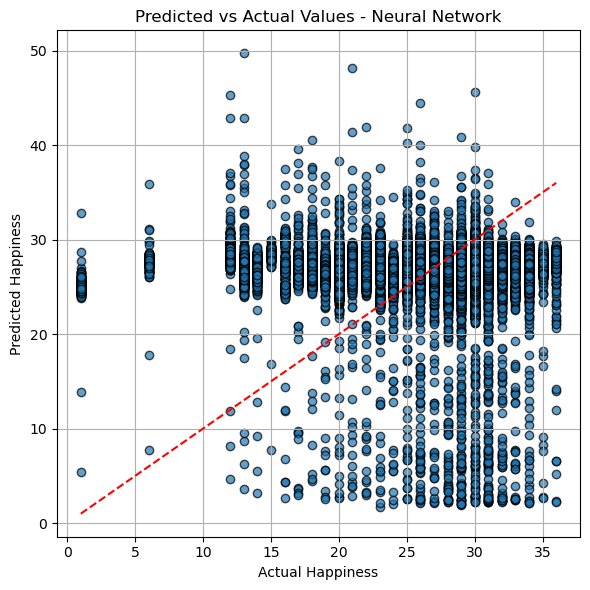

In [251]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(all_y_true, all_y_pred, alpha=0.7, edgecolor='k')
plt.plot([min(all_y_true), max(all_y_true)],
         [min(all_y_true), max(all_y_true)], 'r--')  # perfect prediction line
plt.xlabel('Actual Happiness')
plt.ylabel('Predicted Happiness')
plt.title('Predicted vs Actual Values - Neural Network')
plt.grid(True)
plt.tight_layout()
plt.show()



In [253]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(25, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Added Sigmoid activation for output

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)  # Apply sigmoid to bound output [0,1]
        return x

# Scale targets to [0, 1] before training
y_scaled = y / 36.0

# Training parameters
num_epochs = 150
k_folds = 5
loss_values = []
epoch_losses = []
cv_losses = []

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
start_cv = time.time()

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):

    X_train = torch.FloatTensor(X[train_idx])
    X_val = torch.FloatTensor(X[val_idx])
    y_train = torch.FloatTensor(y_scaled[train_idx])
    y_val = torch.FloatTensor(y_scaled[val_idx])

    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    nn_model = NeuralNet()
    optimizer = optim.Adam(nn_model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    start_fold = time.time()

    for epoch in range(num_epochs):
        nn_model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = nn_model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        nn_model.eval()
        val_loss = 0.0

        # Re-run one final forward pass on the whole dataset to plot actual vs predicted
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y_scaled)

        nn_model.eval()
        
        with torch.no_grad():
            predictions = nn_model(X_tensor).squeeze().numpy() * 36  # Rescale predictions
            actuals = y_tensor.numpy() * 36 
            for inputs, targets in val_loader:
                outputs = nn_model(inputs)
                val_loss += criterion(outputs, targets).item()

        val_loss /= len(val_loader)
        loss_values.append(val_loss)

        if (epoch + 1) % 10 == 0:
            epoch_losses.append(val_loss)

    end_fold = time.time()
    fold_time = end_fold - start_fold
    cv_losses.append(val_loss)

end_cv = time.time()
nn_time = end_cv - start_cv

# Print results
print("\nCross-Validation Results:")
for i, loss in enumerate(cv_losses):
    print(f"Fold {i+1}: Avg Validation Loss = {loss:.4f}")

avg_cv_loss = sum(cv_losses) / k_folds
print(f"\nAverage Cross-Validation Loss: {avg_cv_loss:.4f}")
print(f"Total Cross-Validation Time: {nn_time:.4f} seconds")


/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due 


Cross-Validation Results:
Fold 1: Avg Validation Loss = 0.0280
Fold 2: Avg Validation Loss = 0.0187
Fold 3: Avg Validation Loss = 0.0248
Fold 4: Avg Validation Loss = 0.0206
Fold 5: Avg Validation Loss = 0.0210

Average Cross-Validation Loss: 0.0226
Total Cross-Validation Time: 8.6480 seconds


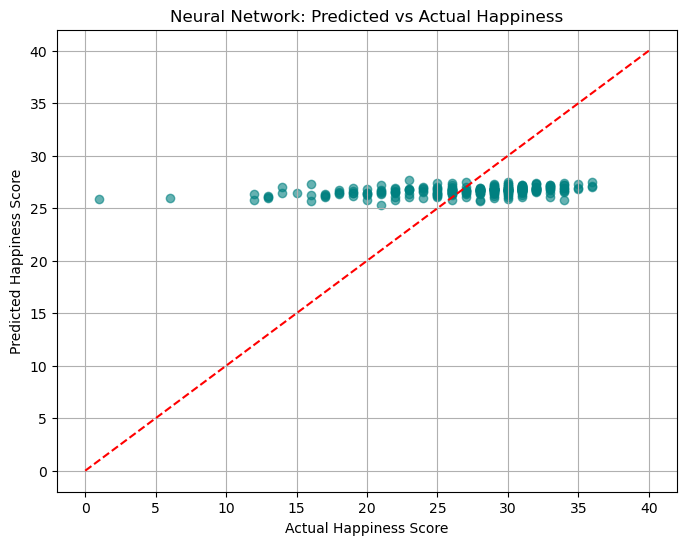

In [254]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions, alpha=0.6, color='teal')
plt.plot([0, 40], [0, 40], '--', color='red')  # Line y = x
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Neural Network: Predicted vs Actual Happiness')
plt.grid(True)
plt.show()